# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [0]:
#Import all the necessary modules
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [80]:
file = '/content/drive/My Drive/PGML/supervisedlearning/Residency-III-lab/pima-indians-diabetes.csv'
df = pd.read_csv(file)
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [81]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [82]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [83]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [84]:
# column not required for replace wirth 0 are class,preg,plas,pres,skin
collist = ['test','mass','pedi','age']
for i in collist:
   df[i] = df[i].replace(0,df[i].median(skipna=True))
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [53]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

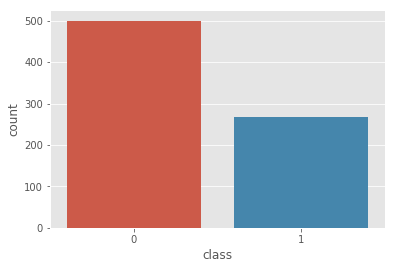

In [85]:
import seaborn as sns
sns.countplot(x='class',data=df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [86]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.355252,0.218806,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.085221,0.184220,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.397161,0.381740,0.183928,-0.113970,0.074752
test,-0.055697,0.355252,0.085221,0.397161,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.218806,0.184220,0.381740,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137337,0.041265,0.183928,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.148457,0.312249,0.173844,0.238356,1.000000


Please find my findings.

*   Plas is highly correlated to class(target feature) as given data.
*   age is less correlated and pres and skin is poorly correlated again to class(target feature)
*   Plas is normally distributed.








# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

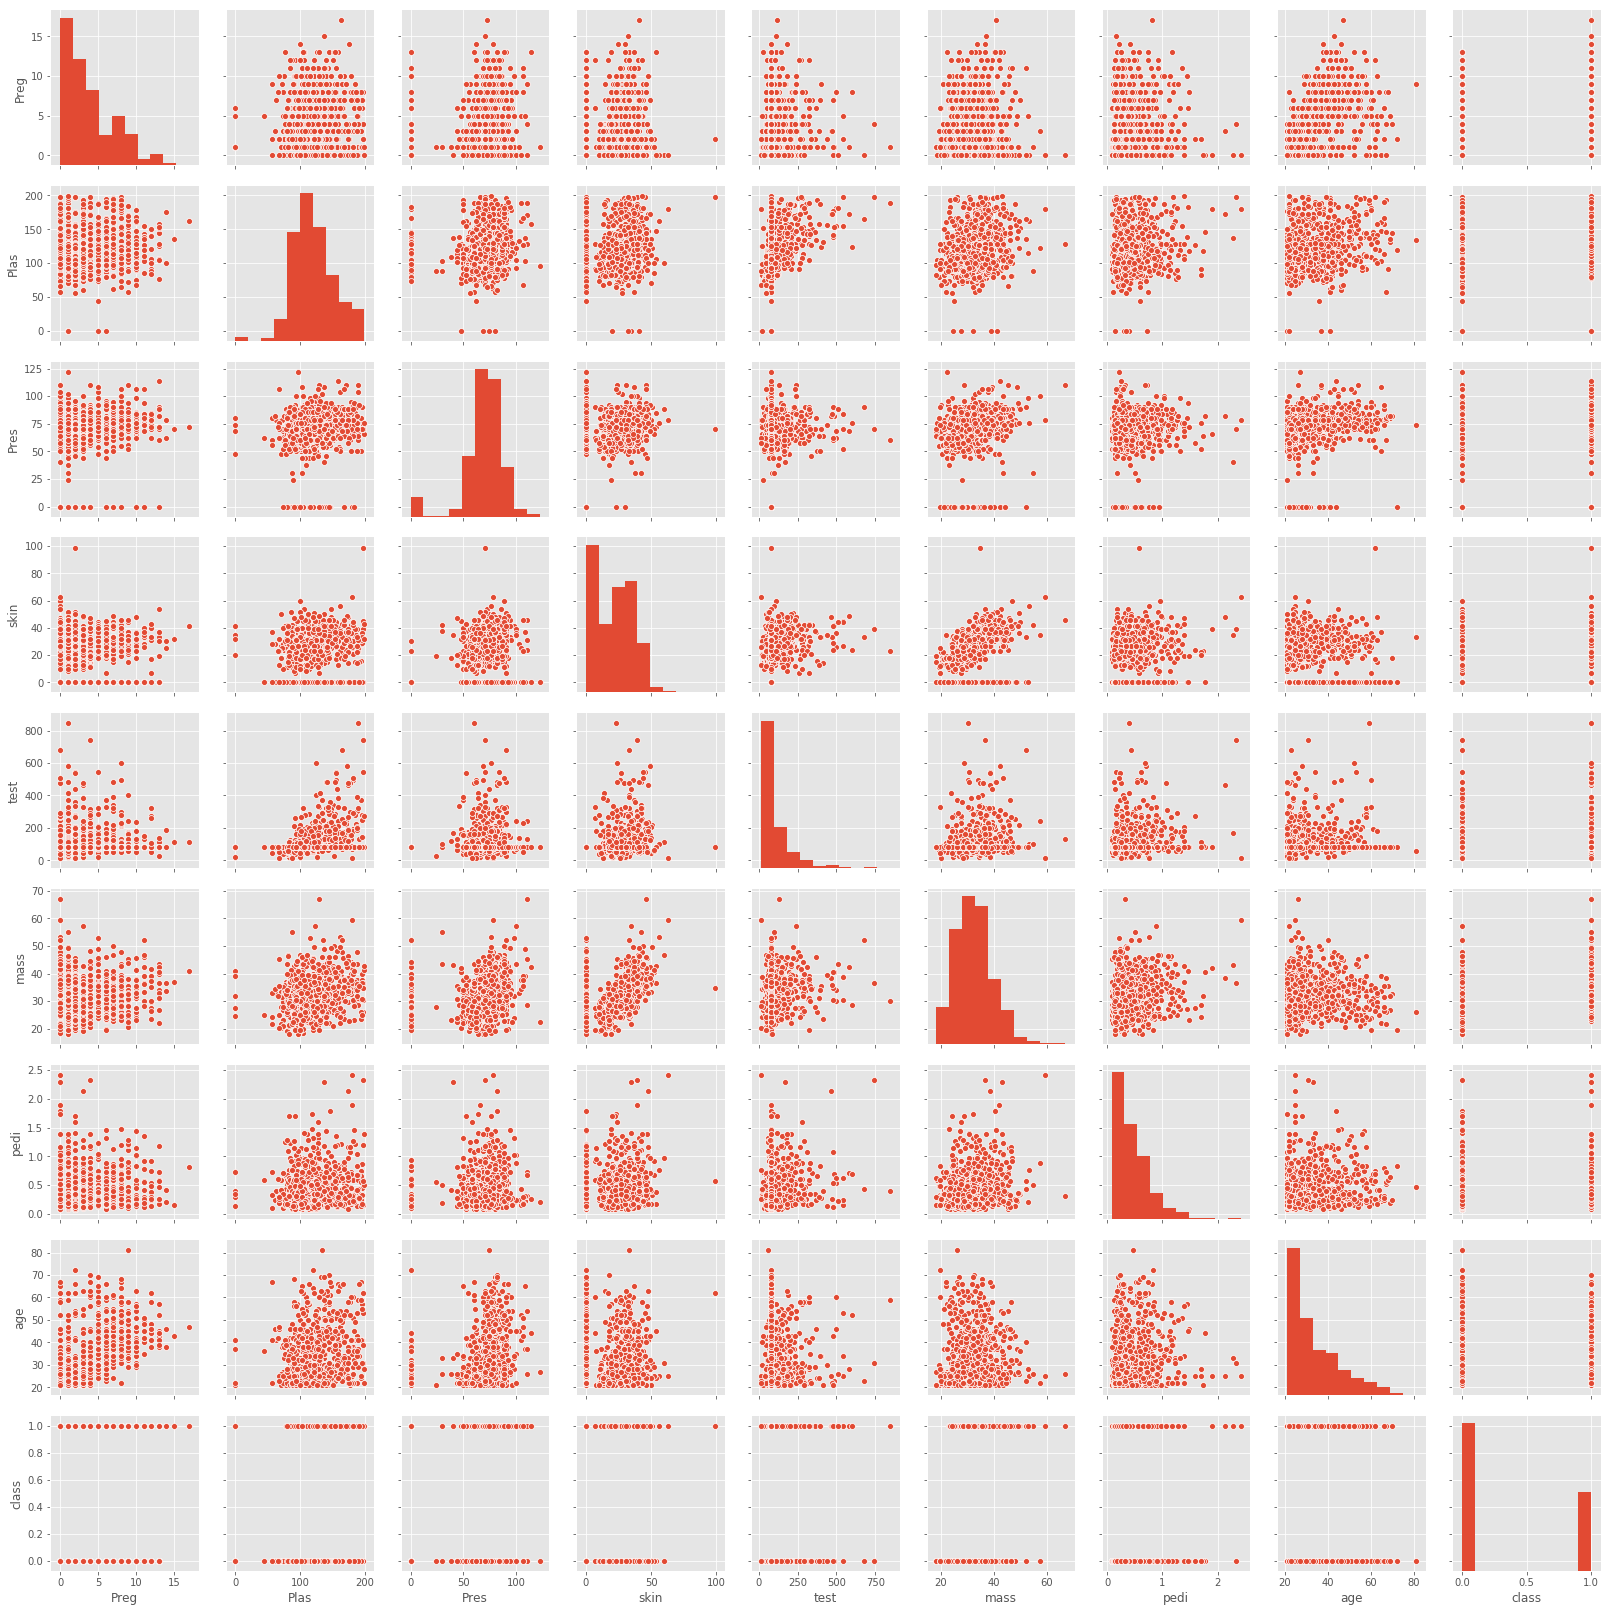

In [32]:
sns.pairplot(df)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [0]:
# Store the inputs as a Pandas Dataframe and set the column names
x = df.drop(['class'], axis=1)

y = df[['class']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [88]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train) 
y_pred_entropy=clf_entropy.predict(X_test)
y_pred_entropy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

# Q10 Print the accuracy of the model & print the confusion matrix 

In [89]:
y_pred_entropy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [90]:

accuracy = accuracy_score(y_test, y_pred_entropy)

print(accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred_entropy)
print(confusion_matrix)

0.7662337662337663
[[123  23]
 [ 31  54]]


Print the feature importance of the decision model - Optional